In [1]:
import numpy as np
import matplotlib.pyplot as plt
from flow_decomposer import FlowDecomposition

In [2]:


#############################################
# New test example using mixed Lorenz systems #
#############################################

def simulate_lorenz(initial, sigma=10, rho=28, beta=8/3, dt=0.01, steps=1000):
    """
    Simulate a Lorenz attractor using Euler integration.
    Returns an array of shape (steps, 3).
    """
    trajectory = np.empty((steps, 3))
    trajectory[0] = initial
    for i in range(1, steps):
        x, y, z = trajectory[i-1]
        dx = sigma * (y - x)
        dy = x * (rho - z) - y
        dz = x * y - beta * z
        trajectory[i] = trajectory[i-1] + dt * np.array([dx, dy, dz])
    return trajectory

steps = 10000

# Simulate three independent Lorenz attractors.
traj1 = simulate_lorenz(initial=[1.0, 1.0, 1.0], steps=steps)
traj2 = simulate_lorenz(initial=[0.1, -1.0, 1.0], steps=steps)
traj3 = simulate_lorenz(initial=[0.5, 0.5, 0.0], steps=steps)

# Stack the three trajectories horizontally.
# This yields a latent data matrix of shape (steps, 9) [3 systems x 3 dimensions each].
X_latent = np.hstack([traj1, traj2, traj3])

M = np.random.randn(X_latent.shape[1], 20)  

# Mix the latent signals to generate the observed data.
X_mixed = X_latent @ M  # shape (steps, observed_dim)
X_mixed = (X_mixed - X_mixed.mean(axis=0))/X_mixed.std(axis=0)
# Initialization parameters for FlowDecomposition.
init_params = {
    "input_dim": 20, 
    "proj_dim": 3,
    "n_components": 3,        
    "num_delays": 0,
    "delay_step": None,
    "subtract_corr": False,
    "device": "cuda",
    "optimizer": "Adagrad",
    "learning_rate": 0.01,
    "random_state": None
}

# Fit parameters.
fit_params = {
    "sample_len": 150,
    "library_len": 800,
    "exclusion_rad": 40,
    "theta": 5,
    "tp": 100,
    "epochs": 100,
    "num_batches": 10,
    "beta": 0,
    "tp_policy": "range",
    "loss_mask_size": None
}

fd = FlowDecomposition(**init_params)
fd.fit(X_mixed, **fit_params)



Epoch 1/100, Loss: 0.9132, ccm_loss: 0.9132, h_norm_loss: 0.8670
Epoch 2/100, Loss: 0.8535, ccm_loss: 0.8535, h_norm_loss: 0.8659
Epoch 3/100, Loss: 0.8361, ccm_loss: 0.8361, h_norm_loss: 0.8612
Epoch 4/100, Loss: 0.7917, ccm_loss: 0.7917, h_norm_loss: 0.8572
Epoch 5/100, Loss: 0.7705, ccm_loss: 0.7705, h_norm_loss: 0.8533
Epoch 6/100, Loss: 0.7298, ccm_loss: 0.7298, h_norm_loss: 0.8508
Epoch 7/100, Loss: 0.7268, ccm_loss: 0.7268, h_norm_loss: 0.8481
Epoch 8/100, Loss: 0.7061, ccm_loss: 0.7061, h_norm_loss: 0.8458
Epoch 9/100, Loss: 0.6817, ccm_loss: 0.6817, h_norm_loss: 0.8430
Epoch 10/100, Loss: 0.6348, ccm_loss: 0.6348, h_norm_loss: 0.8411
Epoch 11/100, Loss: 0.6312, ccm_loss: 0.6312, h_norm_loss: 0.8393
Epoch 12/100, Loss: 0.5996, ccm_loss: 0.5996, h_norm_loss: 0.8373
Epoch 13/100, Loss: 0.5660, ccm_loss: 0.5660, h_norm_loss: 0.8344
Epoch 14/100, Loss: 0.5440, ccm_loss: 0.5440, h_norm_loss: 0.8322
Epoch 15/100, Loss: 0.5354, ccm_loss: 0.5354, h_norm_loss: 0.8304
Epoch 16/100, Loss:

In [3]:
unmixed = fd.predict(X_mixed)

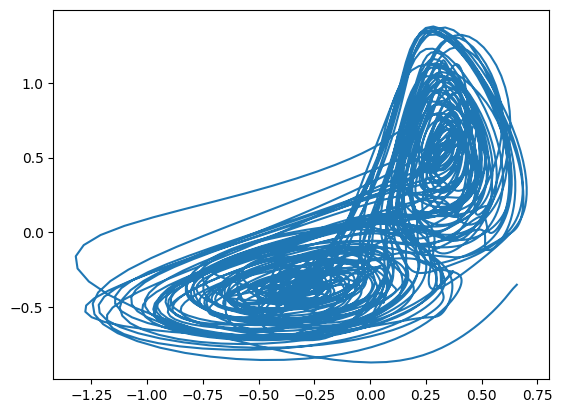

In [4]:
plt.plot(unmixed[:,0,1],unmixed[:,0,2])

In [20]:

# Create dummy data: a time series with 100 points and 1 feature.
X = np.linspace(0, 99, 4000).reshape(1000,4).T.reshape(1000,4)
print(X)

# Initialization parameters dictionary.
init_params = {
    "input_dim": 4,
    "proj_dim": 2,
    "n_components": 1,
    "num_delays": None,
    "delay_step": None,
    "subtract_corr": False,
    "device": "cuda",
    "optimizer": "Adam",
    "learning_rate": 0.01,
    "random_state": 22
}

# Fit parameters dictionary.
fit_params = {
    "sample_len": 50,
    "library_len": 700,
    "exclusion_rad": 1,
    "theta": 3,
    "tp": 20,
    "epochs": 50,
    "num_batches": 1,
    "beta": 0,
    "tp_policy": "range",
    "loss_mask_size": None
}

fd = FlowDecomposition(**init_params)
fd.fit(X, **fit_params)


[[ 0.          0.09902476  0.19804951  0.29707427]
 [ 0.39609902  0.49512378  0.59414854  0.69317329]
 [ 0.79219805  0.89122281  0.99024756  1.08927232]
 ...
 [97.91072768 98.00975244 98.10877719 98.20780195]
 [98.30682671 98.40585146 98.50487622 98.60390098]
 [98.70292573 98.80195049 98.90097524 99.        ]]
Epoch 1/50, Loss: 0.4537, ccm_loss: 0.4537, h_norm_loss: 0.9073
Epoch 2/50, Loss: 0.9997, ccm_loss: 0.9997, h_norm_loss: 0.9150
Epoch 3/50, Loss: 0.5665, ccm_loss: 0.5665, h_norm_loss: 0.9197
Epoch 4/50, Loss: 0.9537, ccm_loss: 0.9537, h_norm_loss: 0.9245
Epoch 5/50, Loss: 0.8420, ccm_loss: 0.8420, h_norm_loss: 0.9225
Epoch 6/50, Loss: 0.4406, ccm_loss: 0.4406, h_norm_loss: 0.9186
Epoch 7/50, Loss: 0.4600, ccm_loss: 0.4600, h_norm_loss: 0.9149
Epoch 8/50, Loss: 0.6385, ccm_loss: 0.6385, h_norm_loss: 0.9114
Epoch 9/50, Loss: 0.9497, ccm_loss: 0.9497, h_norm_loss: 0.9076
Epoch 10/50, Loss: 0.8952, ccm_loss: 0.8952, h_norm_loss: 0.9027
Epoch 11/50, Loss: 0.9931, ccm_loss: 0.9931, h_